<p align="center">
  <img src="imagens/logo.png" width="640">
</p>


#### <p style="text-align: center; font-family:cm; font-size:1.8em;">Distribuição de Matéria Escura na Via Láctea</p>

<p style="font-family:cm; font-size:1em;"><b>Autoria:</b> Lucas Rocha Castro</p>
<p style="font-family:cm; font-size:1em;"><b>Orientadora</b>: Clarissa Martins Siqueira</p>

<p style="font-family:cm; font-size:1em;">A Matéria Escura (ME) é um dos maiores problemas em aberto na Física. Como parte do projeto de pesquisa "A distribuição de Matéria Escura e sua conexão com os observáveis", como bolsista do programa PICT-ON do Observatório Nacional, este código tem como objetivo permitir compreender melhor o comportamento da ME na Via Láctea e, consequentemente, em outros corpos celestes. Foram plotados diversos gráficos, como: plot dos perfis de densidade da Matéria Escura, plot dos diferentes J-factors de aniquilação e decaimento para cada perfil, plot do J-factor em função da latitude e longitude galácticas e, por fim, utilização desses plots barra o cálculo do J barra, ou seja, da média do J-factor para uma região de ângulo sólido do céu. Como base para as informações da distribuição da ME foi utilizado o <em>PPPC 4 DM ID</em> (<a href="https://arxiv.org/abs/1012.4515">Cirelli et al., 2012</a>)
 e, para fins de comparação dos gráficos de J-factor por <em>l</em> e <em>b</em>, foi utilizada a dissertação <em>Exploring the inert doublet model of dark matter with very high-energy gamma-rays observatories</em> (<a href="https://www.teses.usp.br/teses/disponiveis/76/76134/tde-12062024-114530/pt-br.php">Justino, 2024</a>). </p>

---

 <p style="text-align: center; font-family:cm; font-size:1em;">Dados fornecidos no artigo que utilizarei no código: </p>

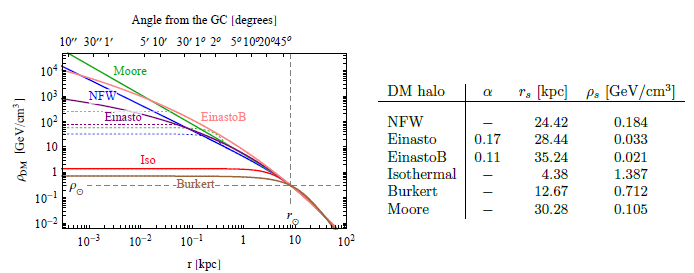

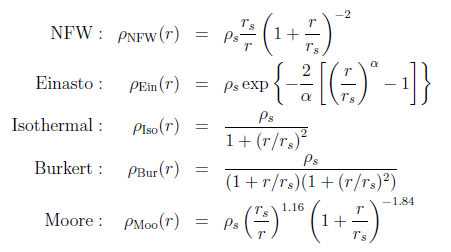

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
from scipy.integrate import quad, simpson, dblquad
from scipy.interpolate import interp1d

In [3]:
rho_sol = 0.4
r_sol = 8.33

r = np.logspace(-3.5, 2, 100)

In [32]:
def grafico ():  
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "cm",
        "text.latex.preamble": r"\usepackage{mathptmx}",
        "figure.facecolor": "white",
        "axes.facecolor": "white",
        "savefig.facecolor": "white",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "text.color": "black"
    })

    plt.title('Perfis de Matéria Escura')
    
    plt.xlabel('r (kpc)')
    plt.ylabel(r'$\rho_{DM} (GeV/cm^3)$')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(r[0], r[-1])
    
    plt.axhline(y = 0.3, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x = 8.33, color='gray', linestyle='--', linewidth=1)
    
    plt.text(7.3, 4e-3, r'$r_\odot$', fontsize=13, color='black', 
             bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    plt.text(4e-4, 0.2, r'$\rho_\odot$', fontsize=13, color='black', 
             bbox=dict(facecolor='white', alpha=1, edgecolor='white'))

In [25]:
def rho_NFW(r):
    r_s = 24.42 
    rho_s = 0.184
    return rho_s * (r_s / r) * (1 + (r / r_s))**(-2)

rho_nfw = rho_NFW(r)

def plot_NFW (r):
    plt.plot(r, rho_nfw)
    plt.ylim(np.min(rho_nfw), np.max(rho_nfw))
    plt.text(0.001, 1000, 'NFW', fontsize=11, color='blue', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [26]:
def rho_Einasto (r):
    r_s_e = 28.44 
    rho_s_e = 0.033 
    alpha_e = 0.17
    return rho_s_e * np.exp((-2 / alpha_e) * ((r / r_s_e)**alpha_e - 1))

rho_ein = rho_Einasto(r)

def plot_Einasto(r):
    plt.plot(r, rho_ein, color='#f29b20')
    plt.ylim(np.min(rho_ein), np.max(rho_ein))
    plt.text(0.004, 100, 'Einasto', fontsize=11, color='#f29b20', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [27]:
def rho_Einasto_B (r):
    r_s_eb = 35.24
    rho_s_eb = 0.021
    alpha_eb = 0.11
    return rho_s_eb * np.exp((-2/alpha_eb) * ((r/r_s_eb)**(alpha_eb) - 1))

rho_ein_b = rho_Einasto_B(r)

def plot_Einasto_B(r):
    plt.plot(r, rho_ein_b, color='#04a001')
    plt.ylim(np.min(rho_ein_b), np.max(rho_ein_b))
    plt.text(0.4, 50, 'EinastoB', fontsize=11, color='#04a001', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [28]:
def rho_Isothermal (r):
    r_s_i = 4.38
    rho_s_i = 1.387
    return (rho_s_i)/(1 + (r/r_s_i)**2)

rho_iso = rho_Isothermal(r)

def plot_Isothermal(r):
    plt.plot(r, rho_iso, color='#e92200')
    plt.ylim(np.min(rho_iso), np.max(rho_iso))
    plt.text(1e-3, 3, 'Isothermal', fontsize=11, color='#e92200', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

In [29]:
def rho_Burkert (r):
    r_s_b = 12.67
    rho_s_b = 0.712
    return ((rho_s_b)/((1+(r/r_s_b)) * (1+(r/r_s_b)**2)))

rho_bur = rho_Burkert(r)

def plot_Burkert(r):
    plt.plot(r, rho_bur, color='#a349c4')
    plt.ylim(np.min(rho_bur), np.max(rho_bur))
    plt.text(1e-1, 3e-1, 'Burkert', fontsize=11, color='#a349c4', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [30]:
def rho_Moore (r):
    r_s_m = 30.28
    rho_s_m = 0.105
    return ((rho_s_m) * ((r_s_m/r)**(1.16) * (1 + (r/r_s_m))**(-1.84)))

rho_moo = rho_Moore(r)

def plot_Moore(r):
    plt.plot(r, rho_moo, color='#755319')
    plt.ylim(np.min(rho_moo), np.max(rho_moo))
    plt.text(3e-3, 9e3, 'Moore', fontsize=11, color='#755319', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

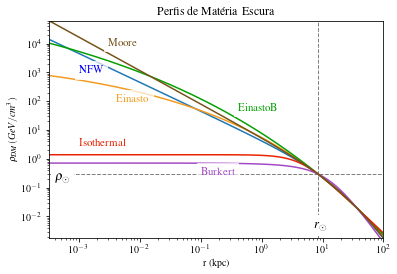

In [31]:
grafico()
plot_NFW(r)
plot_Einasto(r)
plot_Einasto_B(r)
plot_Isothermal(r)
plot_Burkert(r)
plot_Moore(r);

#### <p style="text-align: center; font-family:cm; font-size:1.8em;">J-factor</p>

<p style="font-family:cm; font-size:1em;"> O <em>J-factor</em>, ou fator J, é o fator que descreve a distribuição de matéria escura em uma certa região do espaço. Para o caso de partículas de ME se aniquilando, a expressão para o fator-J é dada pela integração na linha de visada dos perfis de densidade ao quadrado (devido à existência de duas partículas que se aniquilam): </p>

$$
J_{ann} = \int_{\text{l.o.s.}} \rho^2(r(s,\theta))\, ds
$$


<p style="font-family:cm; font-size:1em;"> Para o caso de um fator-J de decaimento, a fórmula é idêntica, com a excessão de que, nesse caso, há apenas uma partícula de ME. Por isso, a densidade não está ao quadrado: </p>

$$
J_{dec} = \int_{\text{l.o.s.}} \rho(r(s,\theta))\, ds
$$

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
profiles = {
    "NFW": rho_NFW,
    "Einasto": rho_Einasto,
    "EinastoB": rho_Einasto_B,
    "Iso": rho_Isothermal,
    "Burkert": rho_Burkert,
    "Moore": rho_Moore,
}

<p style="font-family:cm; font-size:1em;"> Aqui, a partir das expressões para a densidade de Matéria Escura dada pelos diferentes perfis calculados anteriormente, serão integrados e plotados os <em>J-factors</em> de aniquilação e decaimento para diferentes fatores $\theta$. Quanto menor o ângulo, mais próximo do Centro Galáctico. </p>

### J-factor Aniquilação

In [34]:
rho_sol = 0.3
r_sol = 8.33

theta_deg = np.linspace(1e-9, 180, 500)
theta_rad = np.radians(theta_deg)

In [35]:
def J_aniq(theta_rad, rho_func, s_max=1000.0):
    width = max(1e-4, r_sol * theta_rad * 200)
    s_left  = max(0.0, r_sol - width)
    s_right = min(s_max, r_sol + width)

    #malha: grossa + fina + grossa
    s1 = np.linspace(0.0, s_left, 2000, endpoint=False)
    s2 = np.linspace(s_left, s_right, 30000, endpoint=False)  # refinamento pesado
    s3 = np.linspace(s_right, s_max, 2000)

    s = np.concatenate([s1, s2, s3])

    r = np.sqrt(r_sol**2 + s**2 - 2 * r_sol * s * np.cos(theta_rad))
    r = np.maximum(r, 1e-8) 
    
    integrand = (rho_func(r)/rho_sol)**2 / r_sol
    return simpson(integrand, s)

In [36]:
from joblib import Parallel, delayed
J_aniq_all = {
    name: Parallel(n_jobs=-1)(
        delayed(J_aniq)(theta, prof) for theta in theta_rad
    )
    for name, prof in profiles.items()
}

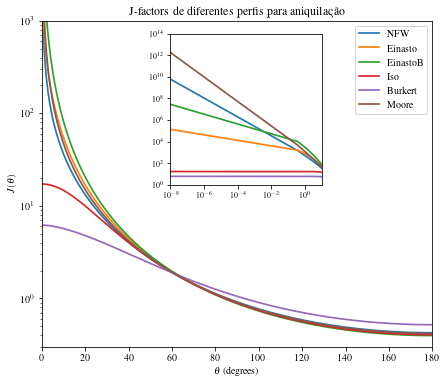

In [41]:
fig, ax = plt.subplots(figsize=(7,6))

for i in range(len(J_aniq_all)):
    ax.plot(theta_deg, list(J_aniq_all.values())[i], label=list(J_aniq_all.keys())[i], linewidth=1.7)
    ax.set_xlim(0, 180)
    ax.set_ylim(0.3, 1e3)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ (degrees)')
    ax.set_ylabel(r'$J(\theta)$')
    ax.set_title("J-factors de diferentes perfis para aniquilação")
    ax.legend()
    
ax_inset = fig.add_axes([0.38, 0.5, 0.3, 0.35])  

for i in range(len(J_aniq_all)):
    ax_inset.plot(theta_deg, list(J_aniq_all.values())[i], linewidth=1.7)
    ax_inset.set_xscale("log")
    ax_inset.set_yscale("log")
    ax_inset.set_xlim(1e-8, 10)
    ax_inset.set_ylim(1, 1e14)
    ax_inset.tick_params(axis='both', which='both', labelsize=8)

### J-factor decaimento

In [38]:
def J_dec(theta_rad, rho_func, s_max=1000.0):
    width = max(5e-4, r_sol * theta_rad * 80)

    s_left  = max(0.0, r_sol - width)
    s_right = min(s_max, r_sol + width)

    s1 = np.linspace(0.0, s_left, 1500, endpoint=False)
    s2 = np.linspace(s_left, s_right, 20000, endpoint=False)
    s3 = np.linspace(s_right, s_max, 1500)

    s = np.concatenate([s1, s2, s3])

    r = np.sqrt(r_sol**2 + s**2 - 2 * r_sol * s * np.cos(theta_rad))
    r = np.maximum(r, 1e-8)
    integrand = rho_func(r) / rho_sol / r_sol
    return simpson(integrand, s)

In [39]:
J_dec_all = {
    name: Parallel(n_jobs=-1)(
        delayed(J_dec)(theta, prof) for theta in theta_rad
    )
    for name, prof in profiles.items()
}

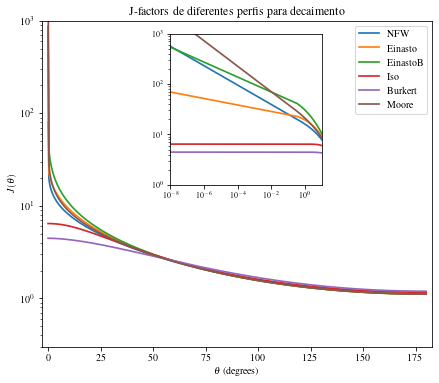

In [42]:
fig, ax = plt.subplots(figsize=(7,6))

for i in range(len(J_aniq_all)):
    ax.plot(theta_deg, list(J_dec_all.values())[i], label=list(J_dec_all.keys())[i], linewidth=1.7)
    ax.set_xlim(-3, 183)
    ax.set_ylim(0.3, 1e3)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ (degrees)')
    ax.set_ylabel(r'$J(\theta)$')
    ax.set_title("J-factors de diferentes perfis para decaimento")
    ax.legend()

#Adicionando o subplot com o zoom
ax_inset = fig.add_axes([0.38, 0.5, 0.3, 0.35])  

for i in range(len(J_aniq_all)):
    ax_inset.plot(theta_deg, list(J_dec_all.values())[i], linewidth=1.7)
    ax_inset.set_xscale("log")
    ax_inset.set_yscale("log")
    ax_inset.set_xlim(1e-8, 10)
    ax_inset.set_ylim(1, 1e3)
    ax_inset.tick_params(axis='both', which='both', labelsize=8)

##### <p style="text-align: center; font-family:times; font-size:2em;">Plot dos perfis de Halo na Via Láctea</p>

<p style="font-family:cm; font-size:1em;"> A partir dos fatores-J da Via Láctea calculados para uma certa direção angular $\theta$, pode-se calcular os fatores-J <b>médios</b> em uma certa região do céu em função de diferentes coordenadas galácticas. Nesse caso, utiliza-se a fórmula do <em>J-factor</em> médio para uma região <em>l</em> x <em>b</em> (longitude galáctica por latitude galáctica). A partir disso, pode-se repetir a operação para diferentes pares de ângulos e plotá-los em formato <em>meshgrid</em>, revelando sua distribuição esférica em torno do centro galáctico.
Uma vez que a distribuição é a mesma para o caso de aniquilação e decaimento, mudando apenas o módulo da intensidade de matéria escura, serão plotados apenas os perfis de aniquilação. É importante apontar que foi feita a substituição $\cos \theta = \cos b \cos l$ para tratar o fator-J em coordenadas galácticas.
</p>

#### <p style="text-align: center; font-family:times; font-size:2em;">Aniquilação</p>

In [43]:
#Parâmetros 
kpc_cm = 3.086e21
rho_sol = 0.3
r_sol = 8.33 

In [44]:
#Meshgrid para plot
l = np.linspace(-10, 10, 150)
b = np.linspace(-10, 10, 150)

lv_deg, bv_deg = np.meshgrid(l, b)
lv_rad = np.radians(lv_deg)
bv_rad = np.radians(bv_deg)

Jmap = np.zeros_like(lv_rad)

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil NFW</p>

In [48]:
def integrand_J(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_NFW(r)**2

#Integrando
s_val = np.linspace(0, 100, 1000) 
def J_nfw(l, b):
    f_val_NFW = integrand_J(s_val, l, b)
    return simpson(f_val_NFW, s_val * kpc_cm) 

In [49]:
Jmap_nfw = np.zeros_like(lv_rad)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_nfw[i, j] = J_nfw(lv_rad[i, j], bv_rad[i, j])

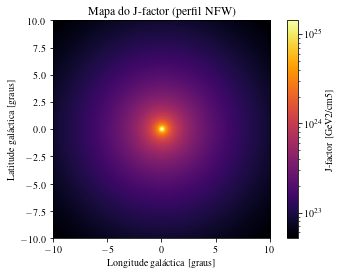

In [50]:
#Plot
plt.imshow(Jmap_nfw, extent=[l.min(), l.max(), b.min(), b.max()],
           cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil NFW)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Einasto</p>

In [51]:
def integrand_J_e(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_Einasto(r)**2

def J_ein(l, b):
    f_val_ein = integrand_J_e(s_val, l, b)
    return simpson(f_val_ein, s_val * kpc_cm) 

In [52]:
Jmap_e = np.zeros_like(lv_rad)
for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_e[i, j] = J_ein(lv_rad[i, j], bv_rad[i, j])

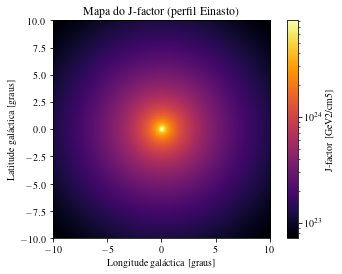

In [53]:
#Plot
plt.imshow(Jmap_e, extent=[l.min(), l.max(), b.min(), b.max()],
            cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Einasto)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Einasto B</p>

In [54]:
def integrand_J_eB(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_Einasto_B(r)**2

def J_einB(l, b):
    f_val_einB = integrand_J_eB(s_val, l, b)
    return simpson(f_val_einB, s_val * kpc_cm) 

In [55]:
Jmap_eB = np.zeros_like(lv_rad)
for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_eB[i, j] = J_einB(lv_rad[i, j], bv_rad[i, j])

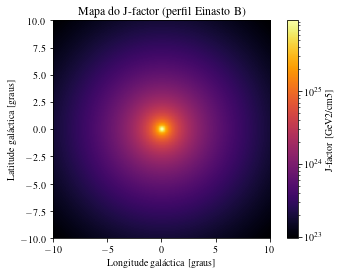

In [56]:
#Plot
plt.imshow(Jmap_eB, extent=[l.min(), l.max(), b.min(), b.max()],
            cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Einasto B)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Moore</p>

In [57]:
def integrand_J_m(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_Moore(r)**2

def J_moore(l, b):
    f_val_m = integrand_J_m(s_val, l, b)
    return simpson(f_val_m, s_val * kpc_cm) 

In [58]:
Jmap_m = np.zeros_like(lv_rad)
for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_m[i, j] = J_moore(lv_rad[i, j], bv_rad[i, j])

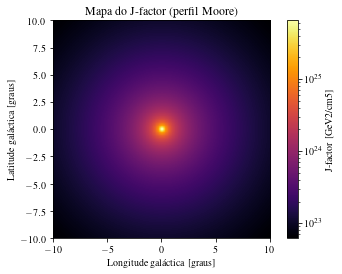

In [59]:
#Plot
plt.imshow(Jmap_m, extent=[l.min(), l.max(), b.min(), b.max()],
            cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Moore)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Isothermal</p>

In [60]:
def integrand_J_I(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_Isothermal(r)**2

def J_Isothermal(l, b):
    f_val_I = integrand_J_I(s_val, l, b)
    return simpson(f_val_I, s_val * kpc_cm) 

In [61]:
Jmap_I = np.zeros_like(lv_rad)
for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_I[i, j] = J_Isothermal(lv_rad[i, j], bv_rad[i, j])

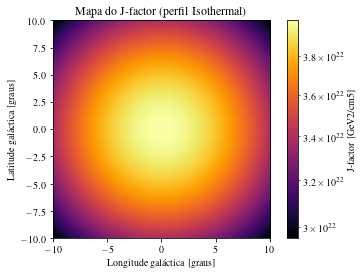

In [62]:
#Plot
plt.imshow(Jmap_I, extent=[l.min(), l.max(), b.min(), b.max()],
            cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Isothermal)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Burkert</p>

In [63]:
def integrand_J_b(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_Burkert(r)**2

def J_burkert(l, b):
    f_val_b = integrand_J_b(s_val, l, b)
    return simpson(f_val_b, s_val * kpc_cm) 

In [64]:
Jmap_b = np.zeros_like(lv_rad)
for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_b[i, j] = J_burkert(lv_rad[i, j], bv_rad[i, j])

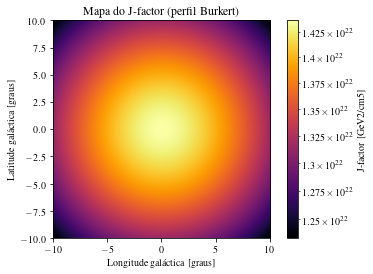

In [65]:
#Plot
plt.imshow(Jmap_b, extent=[l.min(), l.max(), b.min(), b.max()],
            cmap="inferno", origin='lower', norm=LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Burkert)");

##### <p style="text-align: center; font-family:times; font-size:2em;">Recriando a tabela de J-factor Médio por região do céu</p>

<p style="font-family:cm; font-size:1em;"> No artigo <em>Cirelli et. al (2012)</em>, a Tabela 2 apresenta os valores da integração do fator-J médio (J barra) - ver equação acima - para diferentes regiões da Via Láctea. Aqui, serão recuperados esses valores em forma de tabela para os casos de aniquilação e decaimento.
</p>

$$
\Delta \Omega
= 4 \int_{b_{\min}}^{b_{\max}}
\int_{\ell_{\min}}^{\ell_{\max}}
\cos b \, db \, d\ell
$$
<br>
$$
\bar{J}
= \frac{4}{\Delta \Omega}
\iint \cos b \, db \, d\ell \, J(\theta(b,\ell))
$$

In [66]:
def reg(b_min, b_max, l_min, l_max):
    return tuple(map(np.radians, (b_min, b_max, l_min, l_max)))

regiões = {
    'Gal Ridge': reg(0, 0.3, 0, 0.8),
    '3 x 3': reg(0, 3, 0, 3),
    '5 x 5': reg(0, 5, 0, 5),
    '5 x 30': reg(0, 5, 0, 30),
    '10 x 10': reg(0, 10, 0, 10),
    '10 x 30': reg(0, 10, 0, 30),
    '10 x 60': reg(0, 10, 0, 60),
    'GP w/o GC': reg(0, 5, 30, 180),
    'sides of GC': reg(0, 10, 10, 30),
    'outer Galaxy': reg(0, 10, 90, 180),
    '10 - 20': reg(10, 20, 0, 180),
    '20 - 60': reg(20, 60, 0, 180),
    'Gal Poles': reg(60, 90, 0, 180),
}

modelos = {'J̄ NFW': J_nfw, 'J̄ Ein': J_ein, 'J̄ EinB': J_einB, 
           'J̄ Moo': J_moore, 'J̄ Iso': J_Isothermal, 'J̄ Bur': J_burkert}

linhas = []

#### <p style="text-align: center; font-family:times; font-size:2em;">Aniquilação</p>

In [67]:
def calcula_J_barra_perfil(perfil, bmin, bmax, lmin, lmax, DeltaOmega):
    def integrand_J_barra_perfil(l, b):
        return (perfil(l, b) * np.cos(b)) * (4/DeltaOmega)

    J_barra_perfil, _ = dblquad(integrand_J_barra_perfil,
                        bmin, bmax, lambda b: lmin, lambda b: lmax)

    return J_barra_perfil / kpc_cm

In [68]:
for regiao, (bmin, bmax, lmin, lmax) in regiões.items():
    
    #Fazendo com a primitiva direto pra ser analítico e menos custoso
    DeltaOmega = 4 * (lmax - lmin) * (np.sin(bmax) - np.sin(bmin))

    linha = {"Região": regiao, "ΔΩ": DeltaOmega}

    resultados = Parallel(n_jobs=-1)(
        delayed(calcula_J_barra_perfil)(perfil, bmin, bmax, lmin, lmax, DeltaOmega)
        for perfil in modelos.values())

    for nome, valor in zip(modelos.keys(), resultados):
        linha[nome] = valor

    linhas.append(linha)

In [69]:
df = pd.DataFrame(linhas)
titulo_tabela_aniq = df.style.set_caption("Tabela J-factor Aniquilação para regiões da Via Láctea")
display(titulo_tabela_aniq) 

,Região,ΔΩ,J̄ NFW,J̄ Ein,J̄ EinB,J̄ Moo,J̄ Iso,J̄ Bur
0,Gal Ridge,0.000292,1452.855046,1306.650923,9741.624931,5335.797286,12.926059,4.652245
1,3 x 3,0.010961,231.600499,341.344583,1230.610939,544.710688,12.801633,4.617630
2,5 x 5,0.030423,131.224134,202.924548,607.097442,271.286932,12.578810,4.566898
3,5 x 30,0.182539,35.879170,54.027670,131.110387,62.945647,9.067713,3.867729
4,10 x 10,0.121229,58.446624,90.491629,216.690023,102.656628,11.650335,4.384583
5,10 x 30,0.363688,26.650721,39.620387,84.313152,42.542573,8.785138,3.810525
6,10 x 60,0.727376,14.658088,21.259105,43.680568,22.646483,5.699505,2.930462
7,GP w/o GC,0.912693,0.987882,1.029680,1.049875,1.000300,0.962829,0.925984
8,sides of GC,0.242459,10.752769,14.184766,18.124716,12.485546,7.352540,3.523495
9,outer Galaxy,1.091064,0.419695,0.408800,0.394865,0.412832,0.401799,0.503207


#### <p style="text-align: center; font-family:times; font-size:2em;">Decaimento</p>

In [70]:
integrandos_dec = {'J̄ NFW': integrand_J, 'J̄ Ein': integrand_J_e, 'J̄ EinB': integrand_J_eB, 
           'J̄ Moo': integrand_J_m, 'J̄ Iso': integrand_J_I, 'J̄ Bur': integrand_J_b}

linhas_dec = []

In [71]:
def calcula_J_barra_perfil_dec(modelo_decaimento, bmin, bmax, lmin, lmax, DeltaOmega):

    def J_modelo_dec(l, b, modelo_decaimento):
            f_val_dec =  np.sqrt(modelo_decaimento(s_val, l, b))
            return simpson(f_val_dec, s_val) * kpc_cm

    def integrand_J_barra_perfil_dec(l, b):
        return (J_modelo_dec(l, b, modelo_decaimento) * np.cos(b)) * (4/DeltaOmega)

    J_barra_perfil_dec, _ = dblquad(integrand_J_barra_perfil_dec,
                        bmin, bmax, lambda b: lmin, lambda b: lmax)

    return J_barra_perfil_dec / kpc_cm

In [72]:
for regiao, (bmin, bmax, lmin, lmax) in regiões.items():

    DeltaOmega = 4 * (lmax - lmin) * (np.sin(bmax) - np.sin(bmin))

    linha_dec = {"Região": regiao, "ΔΩ": DeltaOmega}

    resultados_dec = Parallel(n_jobs=-1)(
        delayed(calcula_J_barra_perfil_dec)(modelo_decaimento, bmin, bmax, lmin, lmax, DeltaOmega)
        for modelo_decaimento in integrandos_dec.values())

    for nome, valor in zip(integrandos_dec.keys(), resultados_dec):
        linha_dec[nome] = valor

    linhas_dec.append(linha_dec)

In [73]:
df_dec = pd.DataFrame(linhas_dec)
titulo_tabela_dec = df_dec.style.set_caption("Tabela J-factor Decaimento para regiões da Via Láctea")
display(titulo_tabela_dec) 

,Região,ΔΩ,J̄ NFW,J̄ Ein,J̄ EinB,J̄ Moo,J̄ Iso,J̄ Bur
0,Gal Ridge,0.000292,49.798234,56.329971,102.625288,72.643915,15.851900,11.097351
1,3 x 3,0.010961,33.854205,41.221905,59.374392,42.210993,15.791102,11.066553
2,5 x 5,0.030423,29.263977,35.482009,47.708452,34.977715,15.680849,11.018954
3,5 x 30,0.182539,18.038302,20.653578,24.358997,19.863428,13.583663,10.225416
4,10 x 10,0.121229,23.114770,27.329226,33.648683,26.186094,15.201504,10.835692
5,10 x 30,0.363688,17.023987,19.312570,22.208647,18.481667,13.414720,10.160505
6,10 x 60,0.727376,12.522945,13.765312,15.259683,13.282397,10.688705,8.845779
7,GP w/o GC,0.912693,4.522243,4.541019,4.523564,4.516010,4.485103,4.628058
8,sides of GC,0.242459,13.978595,15.304242,16.488629,14.629454,12.521328,9.822912
9,outer Galaxy,1.091064,3.166789,3.136123,3.091300,3.143042,3.137851,3.424901


##### <p style="text-align: center; font-family:times; font-size:2em;">Fluxo de Aniquilação de Matéria Escura</p>

<p style="font-family:cm; font-size:1em;"> O <a href=https://www.marcocirelli.net/PPPC4DMID.html> site</a> do artigo <em>PPPC4DMID</em> possui diferentes tabelas obtidas por colaboradores a partir de simulações e códigos estruturados para compreensão de espectros de diferentes decaimentos e aniquilações de partículas. 
    Neste trabalho, serão utilizados os dados especificamente das partículas Gamma para visualizar o espectro em cascata e, posteriormente, o espectro <em>At Production</em>, ou seja, partículas de matéria escura que se aniquilam de forma direta, sem intermediários, até o produto final (um par de <em>quarks-b</em>).</p>

In [74]:
#Obtendo o caminho para os arquivos
from pathlib import Path

SPECTRA_DIR = Path(
    r"C:\Users\Humberto\Desktop\IC Clarissa ON\Código de Gamma Ray\CascadeSpectra\Spectra")

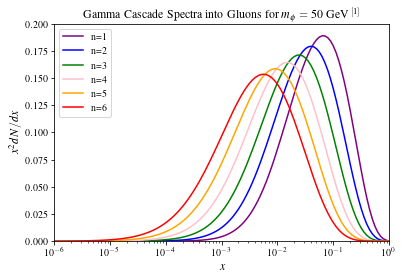

In [75]:
#Abrindo o arquivo
filename = SPECTRA_DIR / "Cascade_G_gammas.dat"
with open(filename) as f:
    lines = (line for line in f if not line.startswith('#'))
    data = np.genfromtxt (lines, names = True ,dtype = None)

#Definindo os parâmetros
mphivals = data["mPhiGeV"]
mphi = 50
index = np.where(np.abs( (mphivals - mphi) / mphi) < 1.e-3)
xvals = 10**(data["Log10x"][index])
flux = [data["n"+str(i)][index]/(np.log(10)*xvals) for i in range(1,7)]

loadspec = [interp1d(xvals,flux[i]) for i in range(6)]
def dNdx(x,step):
    fluxval = loadspec[step-1](x)
    if (x>1 or fluxval<0):
        return 0
    else:
        return fluxval

#Plot
plt.plot(xvals,[x**2*dNdx(x,1) for x in xvals],label='n=1',color='Purple')
plt.plot(xvals,[x**2*dNdx(x,2) for x in xvals],label='n=2',color='Blue')
plt.plot(xvals,[x**2*dNdx(x,3) for x in xvals],label='n=3',color='Green')
plt.plot(xvals,[x**2*dNdx(x,4) for x in xvals],label='n=4',color='Pink')
plt.plot(xvals,[x**2*dNdx(x,5) for x in xvals],label='n=5',color='Orange')
plt.plot(xvals,[x**2*dNdx(x,6) for x in xvals],label='n=6',color='Red')
plt.title('Gamma Cascade Spectra into Gluons for $m_{\phi}=50$ GeV $^{[1]}$')
plt.xscale('log')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$x^2 dN / dx$', fontsize=12)
plt.ylim([0.0,0.2])
plt.xlim([10**-6,1])
plt.legend(fontsize=10,loc=2)
plt.show()

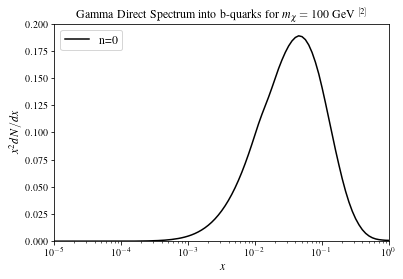

In [76]:
#Abrindo o arquivo
filename = SPECTRA_DIR / "AtProduction_gammas.dat"
finalstate = "b"
with open(filename) as f:
    lines = (line for line in f if not line.startswith('#'))
    data = np.genfromtxt (lines, names = True, dtype = None)

#Definindo os parâmetros
massvals = data["mDM"]
mass = 100
index = np.where(np.abs( (massvals - mass) / mass) < 1.e-3)
xvals = 10**(data["Log10x"][index])

flux = data[finalstate][index]/(np.log(10)*xvals)
loadspec = interp1d(xvals,flux)
def dNdx(x):
    fluxval = loadspec(x)
    if (x>1 or fluxval<0):
        return 0
    else:
        return fluxval

#Plot
plt.plot(xvals, [x**2*dNdx(x) for x in xvals], label='n=0', color='black')
plt.title('Gamma Direct Spectrum into b-quarks for $m_{\chi}=100$ GeV $^{[2]}$')
plt.xscale('log')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$x^2 dN / dx$', fontsize=12)
plt.ylim([0.0,0.2])
plt.xlim([10**-5,1])
plt.legend(fontsize=12,loc=2)
plt.show()

<b>Créditos:</b> 
<br>[1] M.Cirelli, G.Corcella, A.Hektor, G.Hütsi, M.Kadastik, P.Panci, M.Raidal, F.Sala, A.Strumia,
    "PPPC 4 DM ID: A Poor Particle Physicist Cookbook for Dark Matter Indirect Detection'',
    arXiv 1012.4515, JCAP 1210 (2012) E01. 
    
[2] P. Ciafaloni, D. Comelli, A. Riotto, F. Sala, A. Strumia, A. Urbano,
   "Weak corrections are relevant for dark matter indirect detection'',
    arXiv 1009.0224, JCAP 1103 (2011) 019

##### <p style="text-align: center; font-family:times; font-size:2em;">Apêndice: Determinação de $\rho_{\odot}$</p>

<p style="font-family:cm; font-size:1em;">
Para definir os diferentes perfis de densidade de Matéria Escura (NFW, Einasto, etc.) deve-se determinar dois parâmetros importantes: $\rho_{\odot}$ e $r_{\odot}$ - a densidade de matéria escura no Sistema Solar e a distância do Sol até o centro galáctico, respectivamente. O segundo parâmetro é bem estabelecido por observações e aqui foi utilizado o valor de $r_{\odot} = 8,3 kpc$. O primeiro, no entanto, é mais complicado de ser medido. Sua determinação pode ser feita por fit de curvas de rotação de galáxias ou pelo estudo da cinemática estelar devido à atração gravitacional da matéria escura. Ao longo do tempo, diversos autores desenvolveram seus métodos para a determinação desse parâmetro. Aqui, será feito um gráfico que abrange desde a década de 1980 até as medidas mais atuais, bem como suas barras de erro, de acordo com a Tabela 2.2 de <a href=https://arxiv.org/abs/2406.01705> Cirelli et. al, 2024</a>. Ao fim, estabeleu-se um valor final de $\rho_{\odot} = 0.40 GeV/cm^3$.
</p>

In [77]:
# arquivo_rho_sol_dm = Path("data") / "rho_sol_dm.txt"

# df = pd.read_csv(
#     arquivo_rho_sol_dm,
#     delim_whitespace=True,
#     comment="#",
#     encoding="utf-8")

# erro_max = list(df['err_max'])
# erro_min = list(df['err_min'])
# erros_dados = [erro_min, erro_max]

# colors = {'historical': '#31661e', 'PreGAIA': '#880c05', 'PostGAIA': '#045659'}
# #Difinindo o plot dos dados como função para melhorar a perfomance do código
# def plot_rho_ano():
#     ax.errorbar(df.loc[mask, "year"], df.loc[mask, 'rho'],
#                 yerr=np.array(erros_dados)[:, mask],
#                 fmt='o',
#                 color=cor,
#                 ecolor=cor,
#                 capsize=5,
#                 linestyle='None',
#                 label=tipo)
# fig, ax = plt.subplots()

# for tipo, cor in colors.items():
#     mask = df['type'] == tipo
#     plot_rho_ano()
    
# #Adicionando elementos do plot
# ax.axhline(y = 0.4, color = 'darkgrey', linestyle='--', 
#            linewidth=0.6, label='Valor atualmente utilizado')
# ax.legend(loc='best')
# ax.set_title(r'Estimativa para $\rho_{\odot}$ por ano de publicação')
# ax.set_ylabel(r'$\rho_{\odot} [GeV cm^{-3}]$', size=12)
# ax.set_xlabel('Ano', size=12);

In [142]:
#Lendo os dados
arquivo_rho_sol_dm = Path("data") / "rho_sol_dm.txt"

df = pd.read_csv(
    arquivo_rho_sol_dm,
    delim_whitespace=True,
    comment="#",
    encoding="utf-8")

In [171]:
#Fazendo unpack dos elementos a serem utilizados
autores = df['author'].str.replace('_', ' ')
rhos = df['rho']
anos = df['year']
x_erro = [df['err_min'],df['err_max']]

#Criando uma lista com os itens na ordem "[autor], [ano]"
dicio_legenda = dict(zip(autores, anos))
legenda = []
for valores, ano in dicio_legenda.items(): 
    legenda.append(f"{valores}, {ano}")

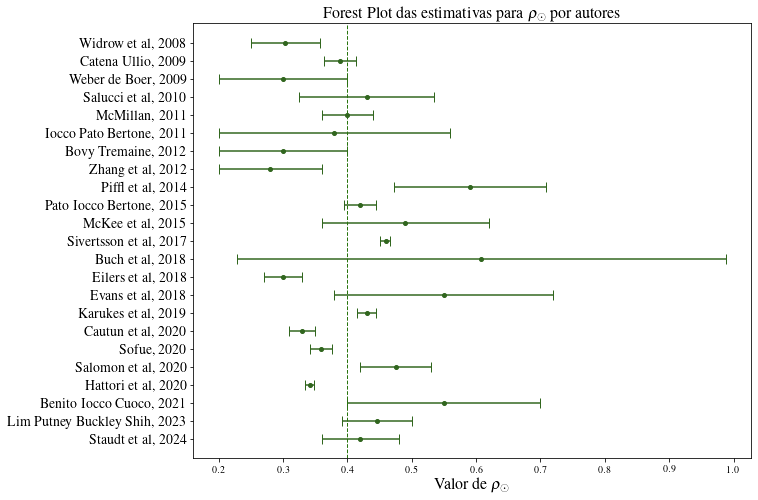

In [174]:
#Fazendo o Florest Plot com o Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
ax.errorbar(x=rhos, y=range(len(autores)), 
            xerr=x_erro, 
            fmt='.',           
            color='#31661e',
            capsize=5,          
            ecolor='#31661e',  
            markersize=8,
            label=tipo)
ax.axvline(x=.4, color='#29740e', linestyle='--', linewidth=1)
ax.set_yticks(range(len(autores)))
ax.set_yticklabels(legenda, size=14)
ax.set_xlabel(r'Valor de $\rho_{\odot}$', size=16)
ax.set_title(r'Forest Plot das estimativas para $\rho_{\odot}$ por autores', size=16)
ax.invert_yaxis();